In [1]:
import selenium.webdriver as selWeb
from bs4 import BeautifulSoup
import requests
import re
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform
rc('font', family='AppleGothic')
import time
from termcolor import colored
import tqdm

%load_ext autoreload
%autoreload 2

In [2]:

def bump():
    wc.comp_lst.append(webb.comp_lst)
#     wc.user_lst.append(webb.user_lst)
    wc.dept_lst.append(webb.dept_lst)
    wc.titl_lst.append(webb.titl_lst)
    wc.dat1_lst.append(webb.dat1_lst)
    wc.diff_lst.append(webb.diff_lst)
    wc.dat2_lst.append(webb.dat2_lst)
    wc.rout_lst.append(webb.rout_lst)
    wc.head_lst.append(webb.head_lst)
    wc.ress_lst.append(webb.ress_lst)
    wc.good_lst.append(webb.good_lst)
    wc.mask_lst.append(webb.mask_lst)
    wc.fell_lst.append(webb.fell_lst)
    wc.took_lst.append(webb.took_lst)
    wc.total_lst = [wc.comp_lst, wc.dept_lst, wc.titl_lst, wc.dat1_lst, wc.diff_lst, wc.dat2_lst, wc.rout_lst, \
 			 wc.head_lst, wc.mask_lst, wc.took_lst, wc.fell_lst, wc.ress_lst, wc.good_lst]
    
def create_table():#company_lst, position_lst, title_lst, record_date_lst, difficulty_lst, interview_date_lst, channel_lst, headline_lst, interview_res_lst, interview_exp_lst, interview_question_lst, answer_thought_lst, announce_duration_lst):
    comp_lst = sum(wc.comp_lst, [])
#     user_lst = sum(wc.user_lst, [])
    dept_lst = sum(wc.dept_lst, [])
    titl_lst = sum(wc.titl_lst, [])
    dat1_lst = sum(wc.dat1_lst, [])
    diff_lst = sum(wc.diff_lst, [])
    dat2_lst = sum(wc.dat2_lst, [])
    rout_lst = sum(wc.rout_lst, [])
    head_lst = sum(wc.head_lst, [])
    ress_lst = sum(wc.ress_lst, [])
    good_lst = sum(wc.good_lst, [])
    mask_lst = sum(wc.mask_lst, [])
    fell_lst = sum(wc.fell_lst, [])
    took_lst = sum(wc.took_lst, [])
    
#     dat1_lst = [datetime.datetime.strptime(i, '%Y%m%d').date() for i in dat1_lst]
    
    df = pd.DataFrame()
    df['company'] = comp_lst
#     df['user_id'] = user_lst
    df["dptment"] = dept_lst
    df["title"] = titl_lst
    df["jp_date"] = dat1_lst
    df["difficult"] = diff_lst
    df["on_date"] = dat2_lst
    df["route"] = rout_lst
    df["headline"] = head_lst
    df["question"] = mask_lst
    df["thought"] = fell_lst
    df["duration"] = took_lst
    df["result"] = ress_lst
    df["experience"] = good_lst
    
    df['jp_date'] = df['jp_date'].astype("datetime64[ns]")
    df['on_date'] = df['on_date'].astype("datetime64[ns]")

    df = df.drop_duplicates()
    print(df.shape)
    return df

# 1. 데이터 수집하는 프로그램
- 잡플래닛에서 데이터 수집하는 프로그램
- 동종업계 및 일하고 싶은 회사 리스트 만들기
- 리스트에 있는 회사에 면접을 본 사람들의 데이터 수집하기
- 데이터 전치리 및 클린징
- 데이터 형태로 변환

## 1-1.회사 리스트 만들기

- 잡 플래닛에서 발표한 기업 만족도 순위 기준으로 리스트 생성

#### a. 회사 리스트 만들기 위해 구현한 함수 선언과 프로그램 실행

In [3]:
def comp_name_id(comp_name):
    name_lst = []
    id_lst = []
    
    for i in comp_name:
        name = str(i).split('>')[2][:-3]
        comp_id = str(i).split('/')[2]
        name_lst.append(name)
        id_lst.append(comp_id)
    return name_lst, id_lst

def comp_info(comp_dept):
    dept_lst = []
    loc_lst = []
    review_lst = []
    salary_lst = []
    interview_lst =[]
    avg_lst =[]

    for i in comp_dept:
        # 회사 이름
        if '''<span class="us_stxt_1">''' in str(i):
            dept = str(i).split('>')[1][:-6]
            dept_lst.append(dept)
        # 회사 위치
        elif '''href="">''' in str(i): 
            reg = str(i).split('>')[1][:-6]
            loc_lst.append(reg)
        # 기업 리뷰 정보 개수
        elif '''기업리뷰''' in str(i):
            rev = str(i).split('>')[1][:-3].split(' ')[0]
            review_lst.append(rev)
        # 기업 연봉 정보 개수
        elif '''연봉정보''' in str(i):
            sal = str(i).split('>')[1][:-3].split(' ')[0]
            salary_lst.append(sal)
        # 기업 면접 정보 개수
        elif '''면접정보''' in str(i):
            interview = str(i).split('>')[1][:-3].split(' ')[0]
            interview_lst.append(interview)
        # 기업 평균 연봉 (만원)
        elif '''평균''' in str(i):
            avg_sal = str(i).split('>')[2].split('<')[0]
            avg_lst.append(avg_sal)
    return [dept_lst, loc_lst, review_lst, salary_lst, interview_lst, avg_lst]

def total_page(interview_lst):
    page_lst = []
    for i in interview_lst:
        num = int(i)
        if num % 5 == 0:
            page = int(num // 5)
            page_lst.append(page)
        else:
            page = int(num // 5) + 1
            page_lst.append(page)
    return page_lst

#### b. 잡 플래닛에 접근하기 위해 직접 구현한 프로그램 불러오기

In [4]:
import web_crawl as wc
from web_crawl import web

In [5]:
jobplanet_id = wc.jobplanet_id
jobplanet_pw = wc.jobplanet_pw
login_url = wc.login_url

login_data = {'user': {'email':jobplanet_id, 'password':jobplanet_pw, 'remember_me':'true'}}
client = requests.session()
login_res = client.post(login_url, json = login_data)

print(login_res.content.decode('utf-8'))
index = client.get(login_url)

{"success":true,"redirect_url":"https://www.jobplanet.co.kr/"}


#### c. 기업 테이블/데이터 생성하기
- 잡 플래닛의 "총 만족도 순위" 참조
- (1 ~ 100 페이지에 기재 된 총 1000개의 회사 불러옴)
- https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache

In [ ]:
name_lst = []
id_lst = []

dept_lst = []
loc_lst = []
review_lst = []
salary_lst = []
interview_lst = []
avg_lst = []

page_lst = []


for i in range(1, 101):
    url = "https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache&page={}".format(i)
    response = client.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    comp_name = soup.select('.us_titb_l3')
    
    names, ids =  comp_name_id(comp_name)
    name_lst.append(names)
    id_lst.append(ids)

    comp_dept = soup.select('.us_stxt_1')
    info = comp_info(comp_dept)
    dept_lst.append(info[0])
    loc_lst.append(info[1])
    review_lst.append(info[2])
    salary_lst.append(info[3])
    interview_lst.append(info[4])
    avg_lst.append(info[5])

name_lst = sum(name_lst, [])
id_lst = sum(id_lst, [])
dept_lst = sum(dept_lst, [])
loc_lst = sum(loc_lst, [])
review_lst = sum(review_lst, [])
salary_lst = sum(salary_lst, [])
interview_lst = sum(interview_lst, [])
avg_lst = sum(avg_lst, [])
total_page = total_page(interview_lst)

config = pd.DataFrame({'company': name_lst,
                       'comp_id': id_lst,
                       'type': dept_lst,
                       'region': loc_lst,
                       'review_cnt': review_lst,
                       'salary_cnt': salary_lst,
                       'interview_cnt': interview_lst,
                       'total_page': total_page,
                       'avg_salary': avg_lst})

print(config.shape)
config

## 1-2. 데이터 생성
- 직접 구현한 프로그램으로 웹에서 데이터 수집
- 수집한 데이터 정제 및 전처리
- 데이터 Qualification 체크 및 최종 확인
- 데이터 형태로 산출하기

#### a. 데이터 생성을 위해 구현한 함수 선언과 프로그램 실행

In [ ]:
def create_table():
    comp_lst = sum(wc.comp_lst, [])
    dept_lst = sum(wc.dept_lst, [])
    titl_lst = sum(wc.titl_lst, [])
    dat1_lst = sum(wc.dat1_lst, [])
    diff_lst = sum(wc.diff_lst, [])
    dat2_lst = sum(wc.dat2_lst, [])
    rout_lst = sum(wc.rout_lst, [])
    head_lst = sum(wc.head_lst, [])
    ress_lst = sum(wc.ress_lst, [])
    good_lst = sum(wc.good_lst, [])
    mask_lst = sum(wc.mask_lst, [])
    fell_lst = sum(wc.fell_lst, [])
    took_lst = sum(wc.took_lst, [])
        
    df = pd.DataFrame()
    df['company'] = comp_lst
    df["dptment"] = dept_lst
    df["title"] = titl_lst
    df["jp_date"] = dat1_lst
    df["difficult"] = diff_lst
    df["on_date"] = dat2_lst
    df["route"] = rout_lst
    df["headline"] = head_lst
    df["question"] = mask_lst
    df["thought"] = fell_lst
    df["duration"] = took_lst
    df["result"] = ress_lst
    df["experience"] = good_lst
    
    df['jp_date'] = df['jp_date'].astype("datetime64")
    df['on_date'] = df['on_date'].astype("datetime64")

    print(df.shape)
    return df


def create_table_test():
    return wc.total_lst

def check_table():
    comp_lst = sum(wc.comp_lst, [])
    dept_lst = sum(wc.dept_lst, [])
    titl_lst = sum(wc.titl_lst, [])
    dat1_lst = sum(wc.dat1_lst, [])
    diff_lst = sum(wc.diff_lst, [])
    dat2_lst = sum(wc.dat2_lst, [])
    rout_lst = sum(wc.rout_lst, [])
    head_lst = sum(wc.head_lst, [])
    ress_lst = sum(wc.ress_lst, [])
    good_lst = sum(wc.good_lst, [])
    mask_lst = sum(wc.mask_lst, [])
    fell_lst = sum(wc.fell_lst, [])
    took_lst = sum(wc.took_lst, [])
        
    print(len(comp_lst), len(dept_lst),len(titl_lst),len(dat1_lst),len(diff_lst),len(dat2_lst),len(rout_lst),len(head_lst),len(mask_lst),len(fell_lst),len(took_lst),len(ress_lst),len(good_lst))


####  b. 구직자 후기 데이터 생성하는 프로그램 실행 (1000개 회사 총 12시간 소요)
- 위에서 생성한 기업 테이블을 순서대로 불러옴
- 각 기업마다 구직자가 남긴 후기 데이터를 차례대로 생성
- 데이터 정제, 전처리, qulification 체크 후 데이터 형태로 산출

#### 용량/시간 비용으로 프로그램을 3개로 나눠 데이터를 추출함
- part1 : 1 ~ 10 page의 회사 데이터 추출 (1시간)
- part1 : 11 ~ 50 page의 회사 데이터 추출 (5시간)
- part1 : 51 ~ 100 page의 회사 데이터 추출 (6시간)

In [ ]:
%%time

page = config['total_page']
coID = config['comp_id']
coNM = config['company']


for num in range(0, len(config)): 

    progress_bar = tqdm.tqdm(total=config['total_page'].iloc[num],
                             desc=config['company'].iloc[num], 
                             position=0)
    
    # 1 페이지 마다 5개의 리뷰가 작성 되어 있음
    for i in range(0, page.iloc[num]):
        url = "https://www.jobplanet.co.kr/companies/{}/interviews/{}?page={}\
              ".format(coID.iloc[num], coNM.iloc[num], i+1)
        response = client.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        company = coNM.iloc[num]####
        
        webb = web(soup, company)
        all_info = soup.find_all('div', {'class': 'content_wrap'})
        if len(all_info) == 0:
            break
        else:      
#             company = coNM.iloc[num]
            webb.crawl(soup, company)
            bump()
        progress_bar.update(1)

#### c. 데이터 검증과 qualification 최종 확인

#### c-1. 총 생성 되어야 할 데이터 row 개수

In [ ]:
cnt = 0
for i in config.interview_cnt:
    cnt += int(i)
cnt

#### c-2. 변수 별 최종 생성된 데이터 row 개수 
- 구직자 후기 중 다 작성하지 않은 Null 데이터는 중간에 삭제하게 구현 함
- 총 10개 미만의 row개수 차이가 있을 수 있음
- $\therefore$ 총 생성 된 변수 별 데이터 row 개수

In [ ]:
check_table()

#### c-3. 데이터 형태로 변환

In [ ]:
df = create_table()
df.head()

#### c-4. 데이터 로컬 컴퓨터에 다운로드 

In [ ]:
# part1 (1, 11)
# part2 (11, 51)
# part3 (51, 101)
# df.to_csv('job_market_part2.csv', index = False )

#### c-5. 로컬에 저장한 데이터 다시 불러오기
- 데이터가 깨지는지 재 확인을 위함
- 이상 없음
- $\therefore$ 총 생성된 raw-data 사이즈는 rows = 10만, columns = 17개

In [6]:
job_df = pd.read_csv('job_market_final.csv')
print(job_df.shape)
job_df.head(3)

(104211, 17)


,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary
0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001"
1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001"
2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001"


### 1-3. 데이터 분석을 위한 파생 변수 생성

#### a. 데이터 파생 변수 생성 1
- year, month 변수 각각 생성 
- (분석 시 쉽게 쿼리 하기 위함)

$\therefore$ 기존 raw-data 사이즈: rows = 10만, columns/변수 = 17개에서
- 2개의 변수 추가하여
- rows = 10만, 변수 = 19개

In [7]:
def year_month(job_df):
    year_lst = []
    mon_lst = []

    for i in job_df.on_date:
        if i == np.nan:
            year = i
            mon = i
            year_lst.append(year)
            mon_lst.append(mon)
        else:
            try:
                year = i[:4]
                mon = i[5:7]
                year_lst.append(year)
                mon_lst.append(mon)
            except TypeError:
                year = i
                mon = i
                year_lst.append(year)
                mon_lst.append(mon)
#     print(len(year_lst), len(mon_lst))
    return year_lst, mon_lst

In [8]:
def process_1(job_df):
    year_lst, mon_lst = year_month(job_df)
    job_df['year'] = year_lst
    job_df['month'] = mon_lst
    print(job_df.shape)
    
    check_year = pd.DataFrame(job_df.year.value_counts(sort = True))
    check_year = check_year.sort_index(ascending = True)
    ax = check_year.plot(kind = 'bar')
    ax.set_xlabel('year (년)')
    ax.set_ylabel('지원자 수 (명)')
    plt.show()
    return job_df

(104211, 19)


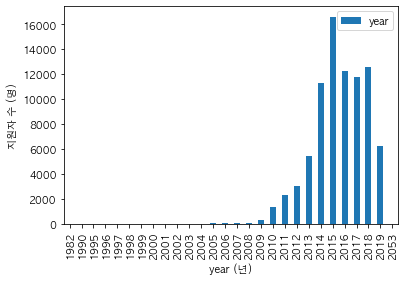

,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01
3,페이스북코리아(유),경영/기획/컨설팅,대리,2019-07-09,어려움,NaN,헤드헌터,폰스크리닝/ 실무 면접 진행 영어로도 질문하고 한국어로도 한다,지원동기와 왜 이업무를 잘할 수 있는지와 베스트 케이스 발표,업무 경력에 맞게 풀어서 대답하였고 솔직한 답변으로 답변,7.0,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",NaN,NaN
4,페이스북코리아(유),마케팅/시장조사,과장,2019-05-31,어려움,2017-04-01,기타,리크루터로부터 연락 오고 짧은 전화 인터뷰 후 1차 면접을 경력과 기술 면접 1차 ...,경력에 관한 질문과 페이스북에서 실제로 직면 한 문제들을 어떻게 풀어갈 것 인지 물어봄,"경력중에서 업무와 관련 된 것을 자세히 대답 했고, 페이스북 sign-up pro...",3.0,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2017,04


In [9]:
job_df = process_1(job_df)
job_df.head()

## 2. 2019년 현재 데이터 쿼리

### 2-1. 2019년 데이터만 쿼리하기
#### a. 전체 데이터 2005 ~ 2019년 데이터의 크기는

In [10]:
print("Total data size:","\nrows =",job_df.shape[0], "\ncolumns =", job_df.shape[1])

Total data size: 
rows = 104211 
columns = 19


#### b. 2019년 데이터

In [11]:
df = job_df[job_df.year == "2019"]
df = df.reset_index()
print("Total data size:","\nrows =",df.shape[0], "\ncolumns =", df.shape[1])
df.head()

Total data size: 
rows = 6244 
columns = 20


,index,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01
3,41,애터미(주),경영/기획/컨설팅,부장,2019-02-19,어려움,2019-02-01,직원추천,인터뷰 이전에 애터미가 주관하는 행사를 직접 참여하여 애터미가 가지는 기업 이미지와...,애터미가 가지는 독특한 사업 형태에 대한 의견.꿈이 무엇인가라는 포괄적으로 인생을 ...,애터미는 다단계라는 편견 속에 있는 착한 기업이다. 착한 기업을 유지하는 것은 임...,NaN,합격,긍정적,112614,유통/무역/운송,충남,"7,748",2019,02
4,43,애터미(주),디자인,사원-대졸,2019-10-24,매우 어려움,2019-10-01,온라인지원,소개로 지원하여 1차 실무진 2차 임원 면접 진행. 인사팀이 면접에 대한 설명 부족...,1차에는 인사팀에서 기업에 맞는 사람인지 파악하려는 질문과 실무진은 현직장에서 하고...,내가 생각하는 범위 내에서 할 수 있는 대답을 하였고 종교는 무교라고 대답.,NaN,합격,부정적,112614,유통/무역/운송,충남,"7,748",2019,10


#### c. 2019년 데이터에  파생 변수 생성 2
- 연봉 데이터 통일
- (1000단위로 그룹화)

In [12]:
avg_sal = []
for i in df.avg_salary:
    conv = float(i.replace(',',''))
    if conv < 2000:
        sal = 1000
    elif conv >= 2000 and conv < 3000:
        sal = 2000
    elif conv >= 3000 and conv < 4000:
        sal = 3000
    elif conv >= 4000 and conv < 5000:
        sal = 4000
    elif conv >= 5000 and conv < 6000:
        sal = 5000
    elif conv >= 6000 and conv < 7000:
        sal = 6000
    elif conv >= 7000 and conv < 8000:
        sal = 7000
    elif conv >= 8000 and conv < 9000:
        sal = 8000
    elif conv >= 9000 and conv < 10000:
        sal = 9000
    elif conv >= 10000:
        sal = 10000
    avg_sal.append(sal)
df['salary'] = avg_sal

In [13]:
avg_sal = []
for i in df.avg_salary:
    conv = float(i.replace(',',''))
    avg_sal.append(conv)
df['avg_salary'] = avg_sal

In [14]:
print("After salary-grouping, \ndata size:","\nrows =",df.shape[0], "\ncolumns =", df.shape[1])

After salary-grouping, 
data size: 
rows = 6244 
columns = 21


#### d. 데이터 파생 변수 생성 3
- 지역명 통일 변수 생성 
- (geo data 사용하기 위해 key값 통일)

In [15]:
prov = pd.DataFrame(df.region.value_counts())
prov

,region
서울,3485
경기,1226
대전,277
전남,188
인천,178
경남,146
충남,128
부산,126
경북,118
대구,72


In [16]:
prov_lst = []
for i in prov.index:
    if i == '서울':
        pr = 'Seoul'
        prov_lst.append(pr)
    elif i == '경기':
        pr = 'Gyeonggi-do'
        prov_lst.append(pr)
    elif i == '대전':
        pr = 'Daejeon'
        prov_lst.append(pr)
    elif i == '전남':
        pr = 'Jeollanam-do'
        prov_lst.append(pr)
    elif i == '인천':
        pr = 'Incheon'
        prov_lst.append(pr)
    elif i == '경남':
        pr = 'Gyeongsangnam-do'
        prov_lst.append(pr)
    elif i == '충남':
        pr = 'Chungcheongnam-do'
        prov_lst.append(pr)
    elif i == '부산':
        pr = 'Busan'
        prov_lst.append(pr)
    elif i == '경북':
        pr = 'Gyeongsangbuk-do'
        prov_lst.append(pr)
    elif i == '제주':
        pr = 'Jeju'
        prov_lst.append(pr)
    elif i == '울산':
        pr = 'Ulsan'
        prov_lst.append(pr)
    elif i == '강원':
        pr = 'Gangwon-do'
        prov_lst.append(pr)
    elif i == '세종':
        pr = 'Sejong'
        prov_lst.append(pr)
    elif i == '충북':
        pr = 'Chungcheongbuk-do'
        prov_lst.append(pr)
    elif i == '광주':
        pr = 'Gwangju'
        prov_lst.append(pr)
    elif i == '전북':
        pr = 'Jeollabuk-do'
        prov_lst.append(pr)
    elif i == '해외':
        pr = 'overseas'
        prov_lst.append(pr)
    elif i == '대구':
        pr = 'Daegu'
        prov_lst.append(pr)
    else:
        pr = 'others'
        prov_lst.append(pr)

prov['reg'] = prov_lst
print(len(prov.index), len(prov_lst))
prov

19 19


,region,reg
서울,3485,Seoul
경기,1226,Gyeonggi-do
대전,277,Daejeon
전남,188,Jeollanam-do
인천,178,Incheon
경남,146,Gyeongsangnam-do
충남,128,Chungcheongnam-do
부산,126,Busan
경북,118,Gyeongsangbuk-do
대구,72,Daegu


#### d-1. province 만 다룰 데이터 따로 생성

In [17]:
# ! pip install folium

In [18]:
import os
import folium
import json
from IPython.display import HTML
import warnings

warnings.filterwarnings(action='ignore')
cwd = str(os.getcwd())
geo_path = cwd + '/skorea-provinces.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [19]:
color_lst = []
for i in prov.region:
    if i > 3000:
        co = 'red'
        color_lst.append(co)
    elif i > 1000 and i <= 3000:
        co = 'orage'
        color_lst.append(co)
    elif i > 200 and i <= 1000:
        co = 'blue'
        color_lst.append(co)
    elif i > 100 and i <= 200:
        co = 'green'
        color_lst.append(co)
    else:
        co = 'yellow'
        color_lst.append(co)
prov['color'] = color_lst
prov['count'] = np.log2(prov['region'])

In [20]:
prov = prov.reset_index()
prov

,index,region,reg,color,count
0,서울,3485,Seoul,red,11.766943
1,경기,1226,Gyeonggi-do,orage,10.259743
2,대전,277,Daejeon,blue,8.113742
3,전남,188,Jeollanam-do,green,7.554589
4,인천,178,Incheon,green,7.475733
5,경남,146,Gyeongsangnam-do,green,7.189825
6,충남,128,Chungcheongnam-do,green,7.000000
7,부산,126,Busan,green,6.977280
8,경북,118,Gyeongsangbuk-do,green,6.882643
9,대구,72,Daegu,yellow,6.169925


#### d-2. prov 데이터로 우리나라 특별시/광역시/도 별 구직자의 활동 확인


In [21]:
the_map = folium.Map(location = [36, 127.5], zoom_start = 7, tiles = 'Mapbox Bright')
the_map.choropleth(geo_data = geo_str, 
               data = prov, 
               columns = ['reg','count'],
               key_on = 'feature.properties.NAME_1',
               fill_color = 'YlOrRd',
               nan_fill_color = 'white')
the_map.save('map.html')
# HTML('<iframe src=map.html width=500 height=650></iframe>')

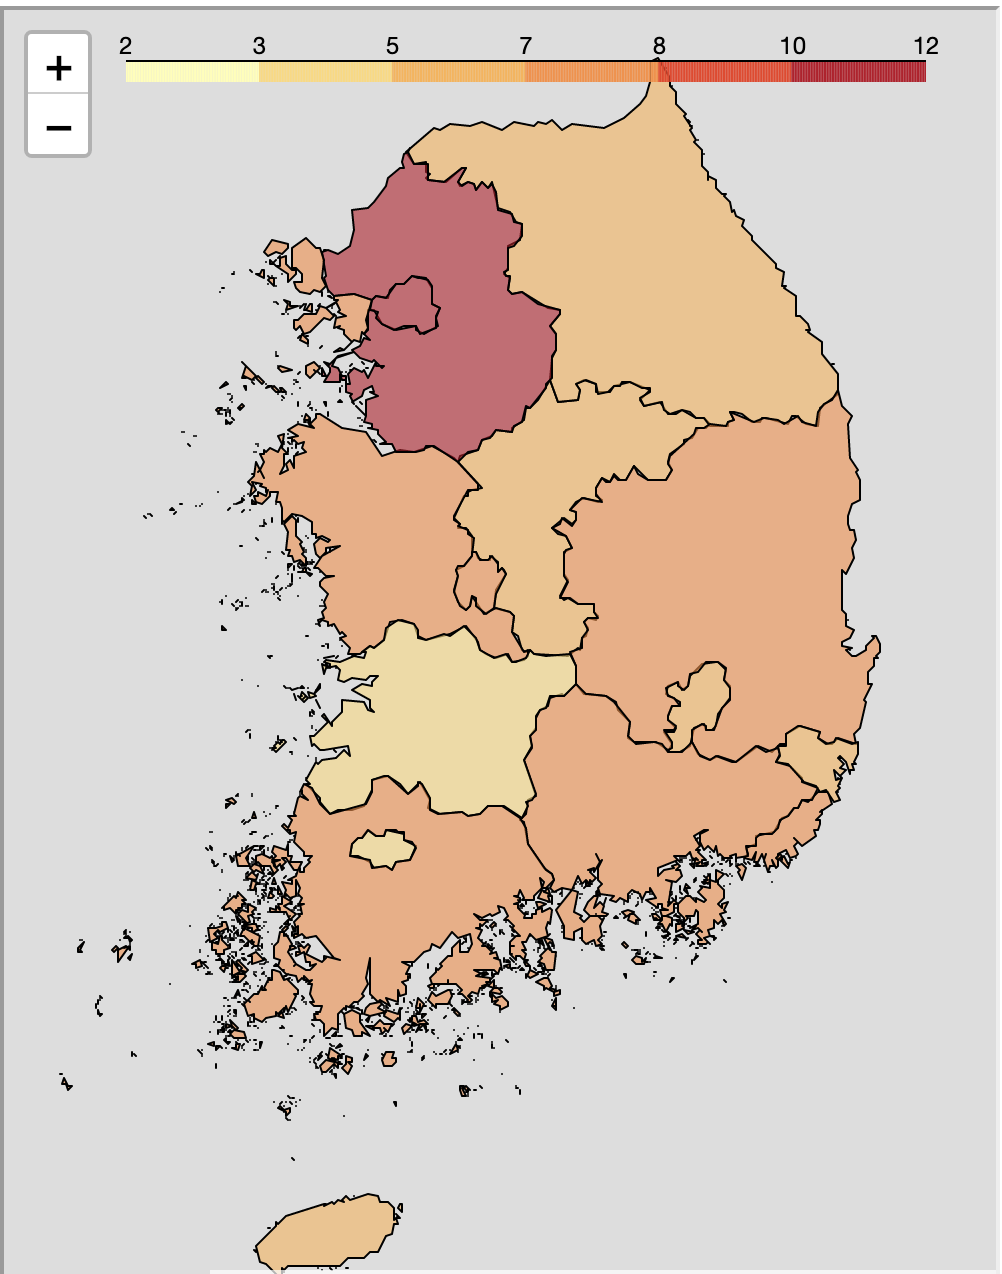

In [22]:
from IPython.display import Image
Image(filename='first.png', width = 400, height = 300)

## 3. 2019년 현재 구직자들의 특성 분석
- 각 변수를 기준으로 세그먼트 분석 실시

### 시각화를 위한 함수 선언과 프로그램 실행

In [23]:

def pie_graph_double(df, by, key, val, ok):
    query = df[str(by)][df[str(key)]==str(val)].value_counts(ascending = True)
    total_sum = query.values.sum()
    print("Total Applicants:", total_sum)

    lab_lst = []
    val_lst = []
    col_lst = []
    for label, value in zip(query.index, query.values):
        if label == '합격':
            color = 'green'
            col_lst.append(color)
        elif label == '대기중':
            color = 'yellowgreen'
            col_lst.append(color)
        elif label == '불합격':
            color = 'red'
            col_lst.append(color)
        else:
            label == label
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
    plt.title(str(val)+ '기준 '+ str(by)+'별 지원자 수 그래프')

    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
        
    plt.subplot(1,2,2)
    try:
        plt.pie(ratio, labels = lab_lst, colors = col_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst))  
    except StopIteration:
        plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst))  
    plt.title(str(val)+ '기준 '+ str(by)+'별 지원자 비율 그래프')

    plt.show()
    query_index = query.index
    
    if ok == True:
        res = pd.DataFrame({str(by):query_index[-3:],
                            str(val):ratio[-3:]})

        return res
    elif ok == False:
        return
    
def pie_graph_single(df, by):
    query = df[str(by)].value_counts()
    
    total_sum = query.values.sum()
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    query.plot(kind = 'bar')
#     plt.ylabel('총 지원자 수')
    plt.title(str(by)+ '별 지원자 수 그래프')
    plt.subplot(1,2,2)
    
    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
    
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst)) 
    plt.title(str(by)+ '별 지원자 비율 그래프')
    plt.show()
    
def comp_map_pass(df, comp_type, title, user_title):
    df['company'][(df['type'] == str(comp_type))&(df[str(title)] == str(user_title))&
                  (df['result'] == '합격')].value_counts(ascending = True)[-10:].plot(kind = 'barh')
    plt.show()
    
    reg_df = pd.DataFrame(df['region'][(df['type'] == str(comp_type))&(df[str(title)] == str(user_title))&
                                       (df['result'] == '합격')].value_counts(ascending = True))
    reg_df = reg_df.reset_index()
    
    map_df = pd.merge(reg_df, prov, how = 'left', on = 'index')
    the_map = folium.Map(location = [36, 127.5], zoom_start = 7, tiles = 'Mapbox Bright')
    the_map.choropleth(geo_data = geo_str, 
                   data = map_df, 
                   columns = ['reg','region_x'],
                   key_on = 'feature.properties.NAME_1',
                   fill_color = 'YlOrRd',
                   nan_fill_color = 'white')
    the_name =str(comp_type).split('/')[0]+'_'+str(user_title).split('-')[1]+'.html'
    print(the_name)
    the_map.save(the_name)
#     return HTML('<iframe src='+the_name+' width=500 height=650></iframe>')


### 3-1. 2019년 구직자의 직급 현황
- **트렌드**: 사회 초년생일 수록 구직 활동이 활발하고, 직급이 높을 수록 구직 활동량이 현저히 낮아짐
- **insight**: 사회 초년생의 비율은 *사원-대졸(63.6%)*, *사원-대졸(8.1)*, *사원-고졸(4%)*로 **전체 구직 활동자의 약 76%**를 차지함

$\therefore$ 사회 초년생의 구직 활동이 2019년 전체 잡-마켓에서 가장 활발 함

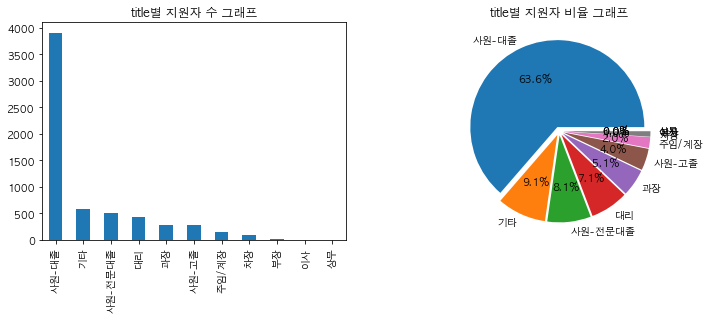

In [24]:
pie_graph_single(df, 'title')

### 3-2. 2019년 [사원] 직급자 별 지원 산업 현황
#### [3-1]에서 사원-대졸, 사원-전문대졸, 사원-고졸 구직자의 구직 활동량이 많으므로 디테일 분석 실시

|사원|총 지원자|1st인기산업|지원율|2nd인기산업|지원율|3rd인기산업|지원율|
|----|----|----|----|----|----|----|----|
|**사원-대졸**   |3908|제조/화학 |28% |IT/웹/통신|19% | 은행/금융업| 12%|
|**사원-전문대졸**|505 |제조/화학 |39% |IT/웹/통신 | 17%| 의료/제약/복지| 13%|
|**사원-고졸**   |280 |제조/화학 |41%|은행/금융업 | 17%|IT/웹/통신| 16%|



Total Applicants: 3908


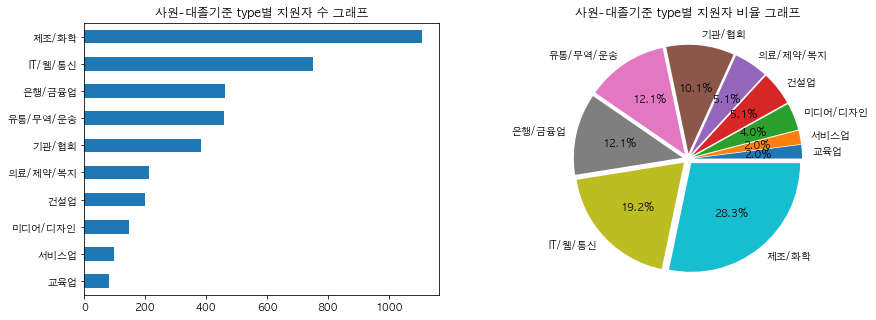

Total Applicants: 505


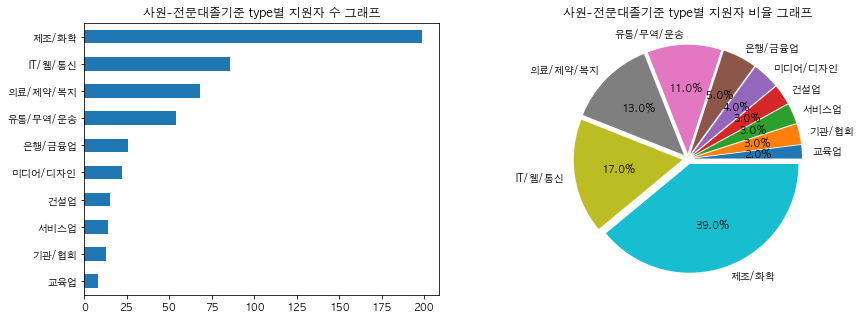

Total Applicants: 280


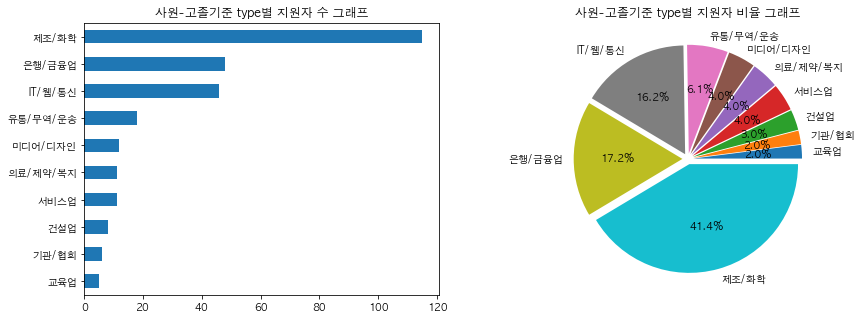

In [25]:
val_lst1 = ['사원-대졸', '사원-전문대졸', '사원-고졸']
for i in val_lst1:
    pie_graph_double(df, 'type', 'title', i, False)

### 3-3. 2019년 [사원] 직급자 별 지원 기업 현황과 기업 위치
- 1. 제조/화학
- 2. IT/웹/통신

#### a. 제조/화학
- 서울/경기/인천/충청/전남/경상도에 고루 구직 활동

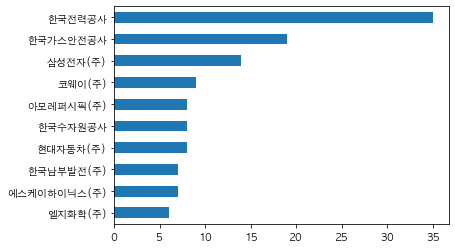

제조_대졸.html


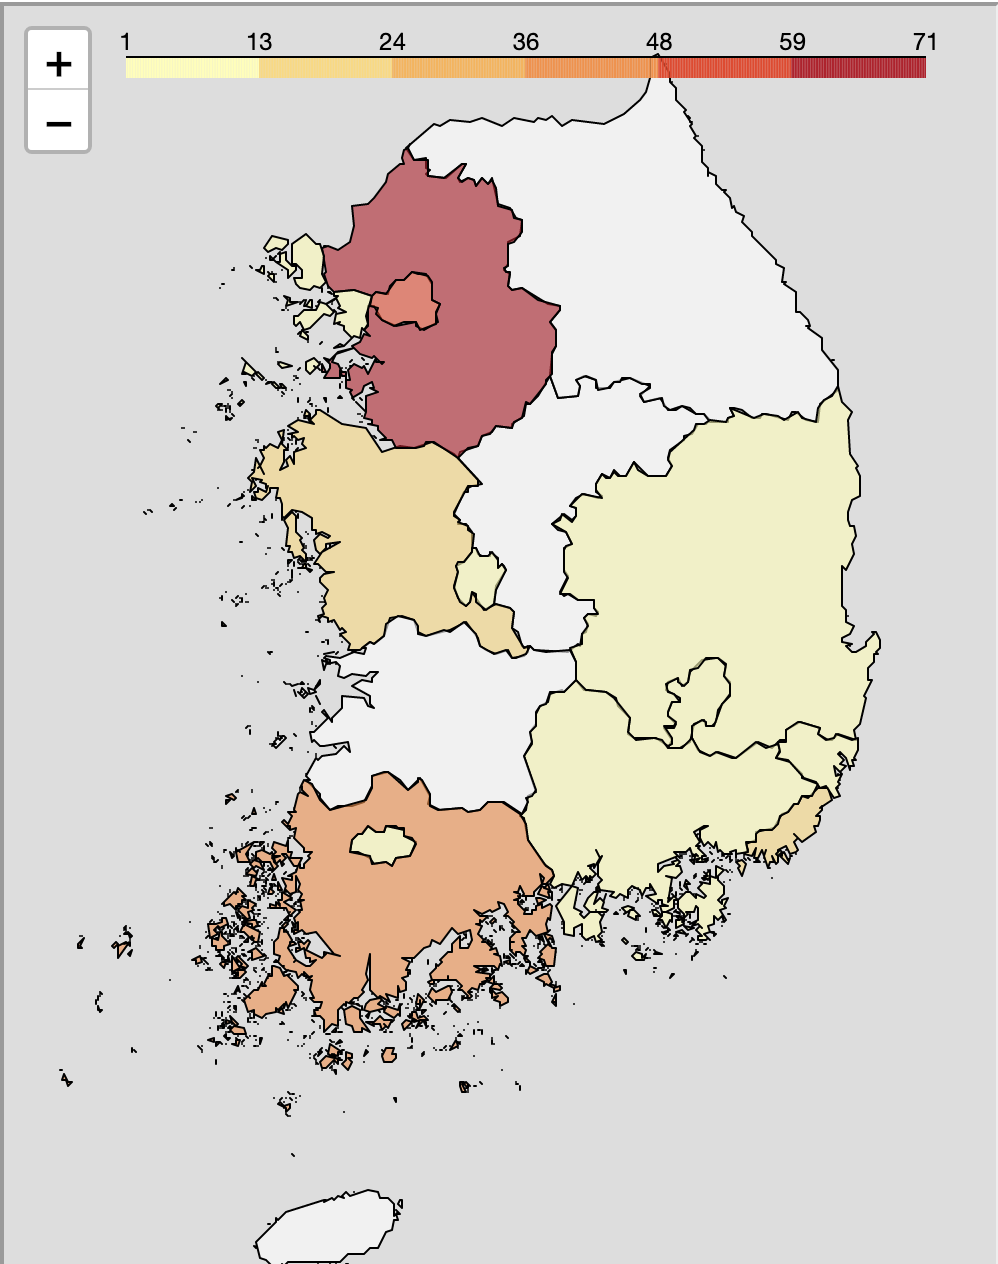

In [26]:
comp_map_pass(df, '제조/화학', 'title', '사원-대졸')
Image(filename='second.png', width = 400, height = 300)

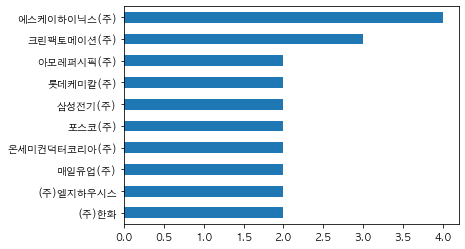

제조_전문대졸.html


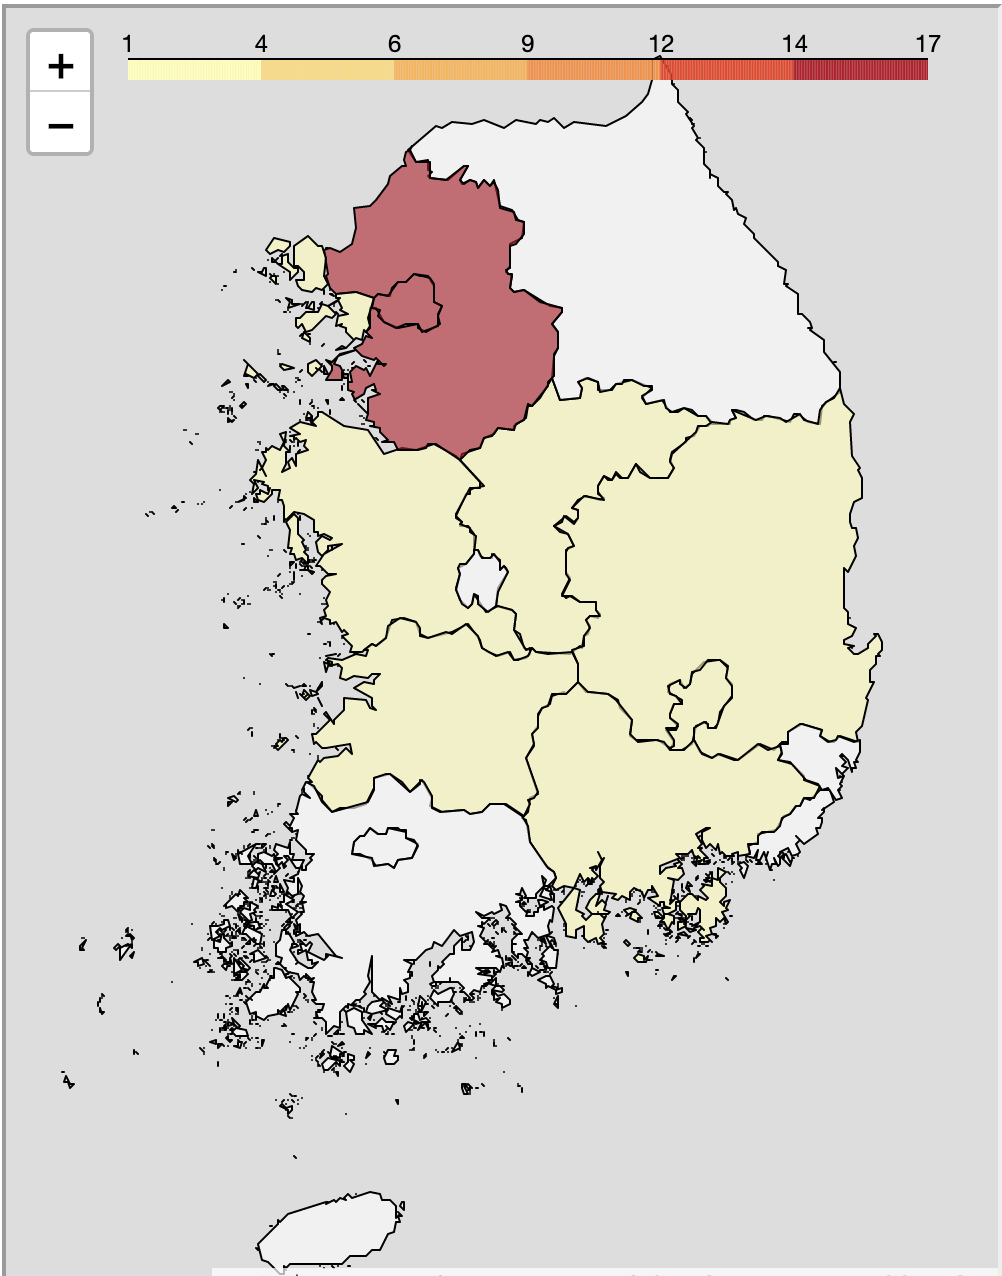

In [27]:
comp_map_pass(df, '제조/화학', 'title', '사원-전문대졸')
Image(filename='third.png', width = 400, height = 300)

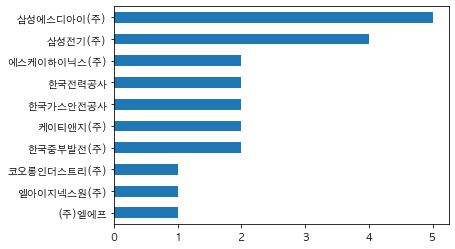

제조_고졸.html


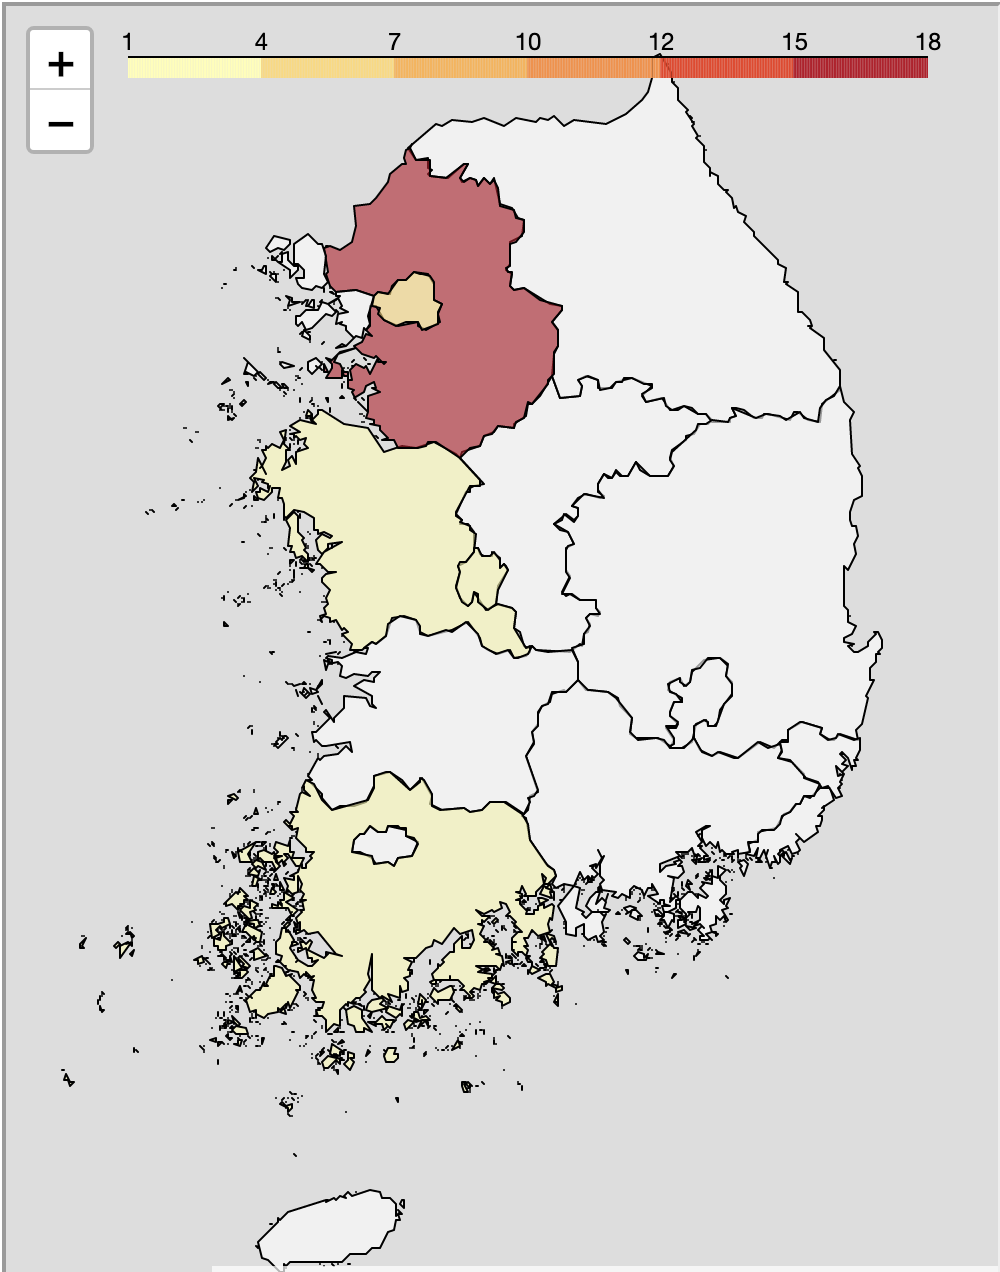

In [28]:
comp_map_pass(df, '제조/화학', 'title', '사원-고졸')
Image(filename='fourth.png', width = 400, height = 300)

#### b. IT/웹/통신
- 서울/경기/제주에 국한 되어 구직 활동

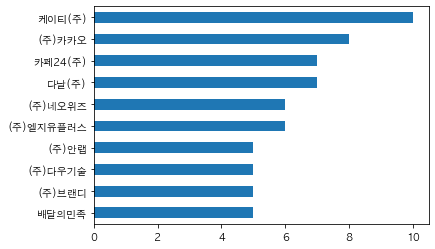

IT_대졸.html


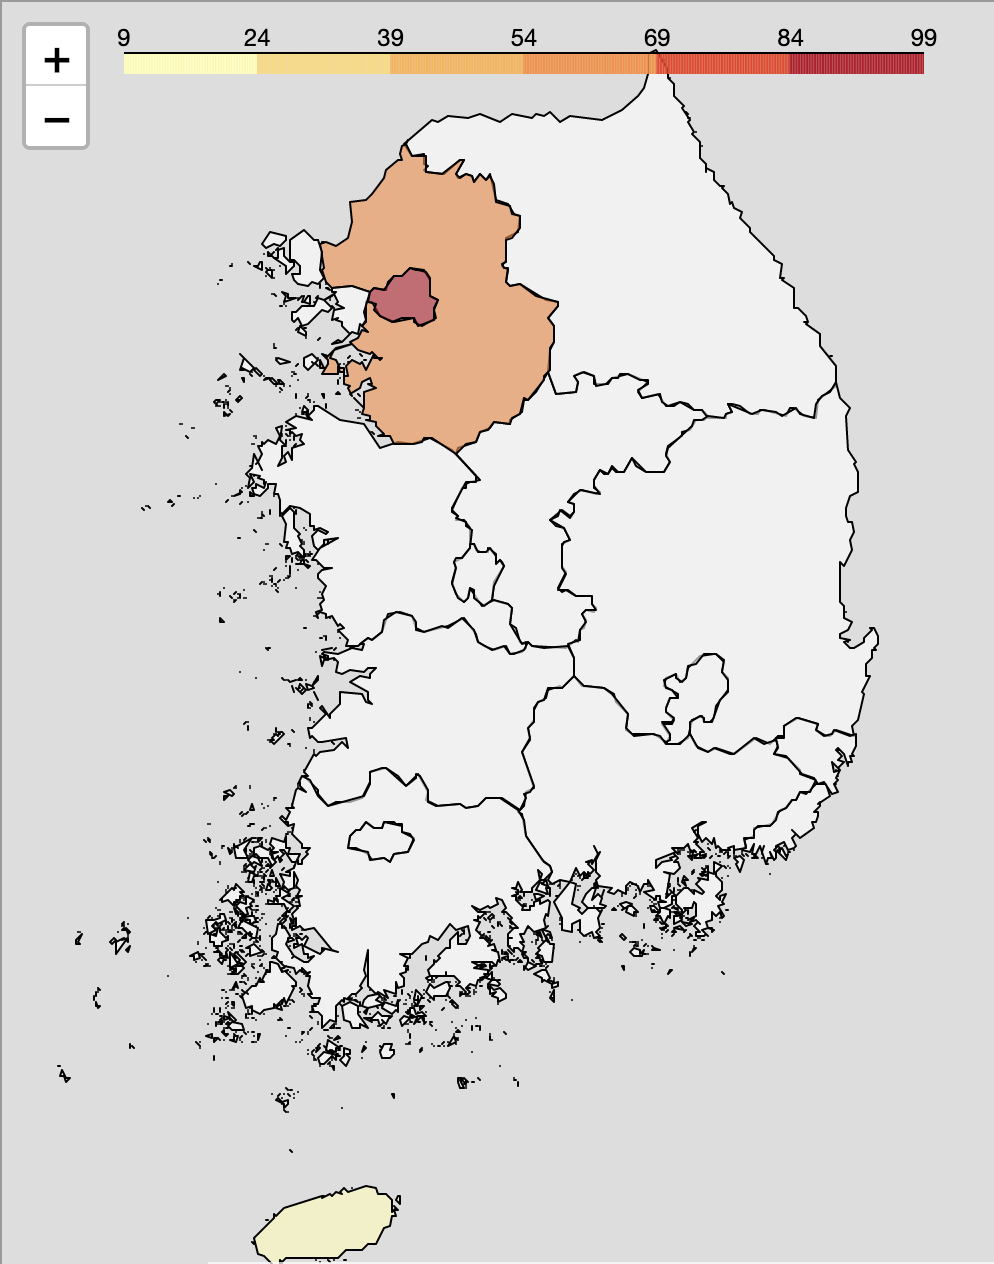

In [29]:
comp_map_pass(df, 'IT/웹/통신', 'title', '사원-대졸')
Image(filename='fifth.png', width = 400, height = 300)

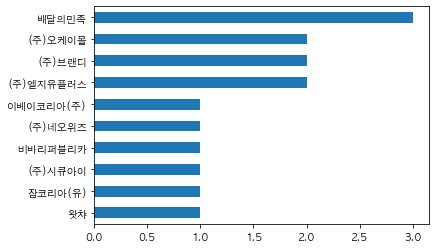

IT_전문대졸.html


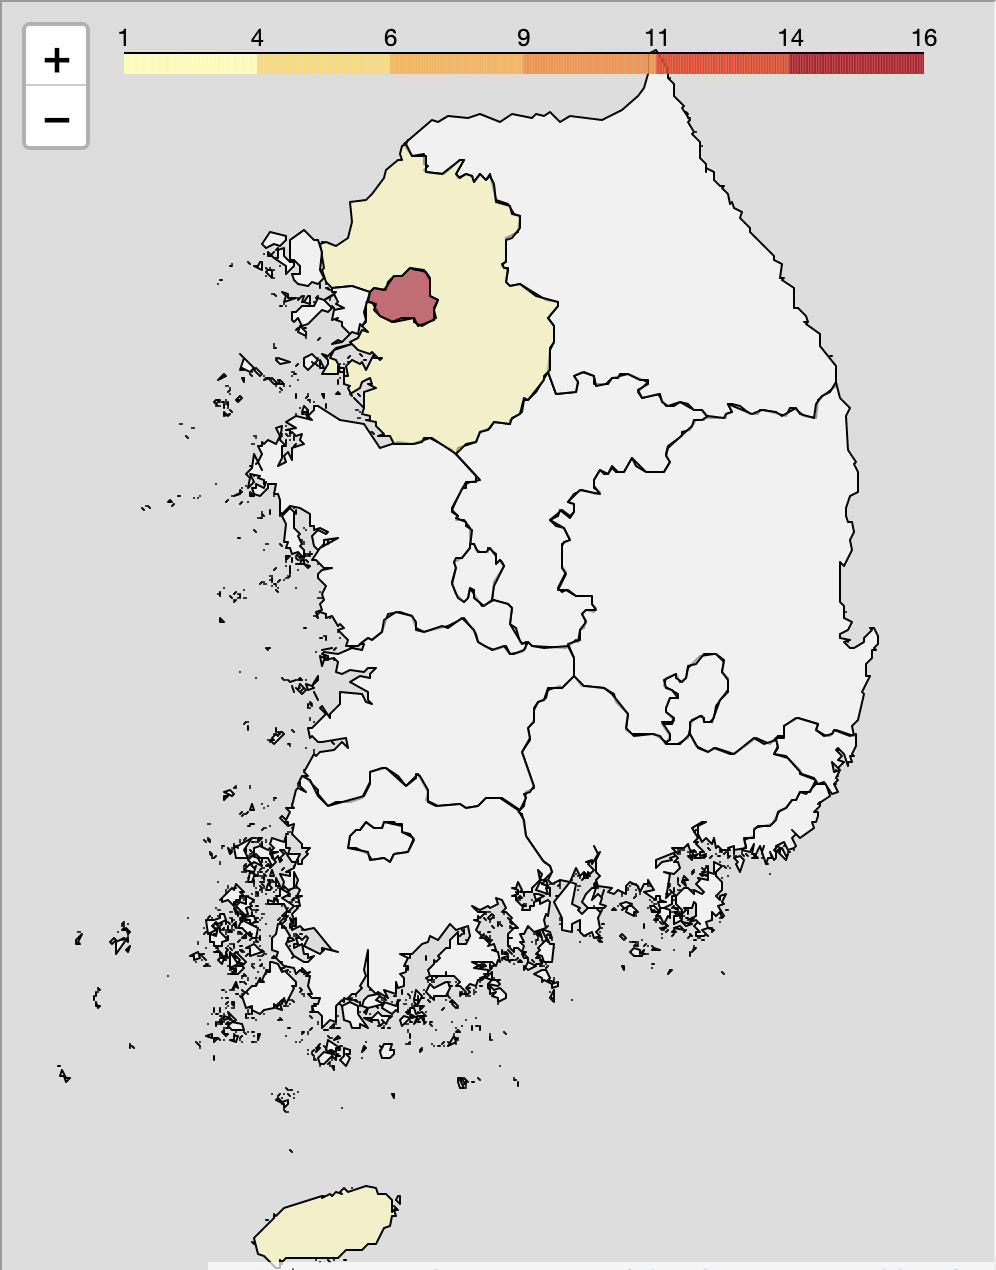

In [30]:
comp_map_pass(df, 'IT/웹/통신', 'title', '사원-전문대졸')
Image(filename='sixth.png', width = 400, height = 300)

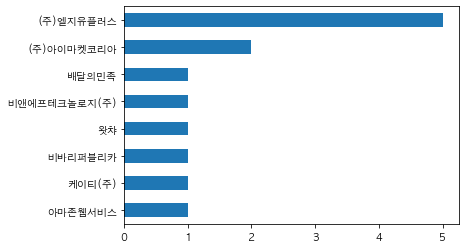

IT_고졸.html


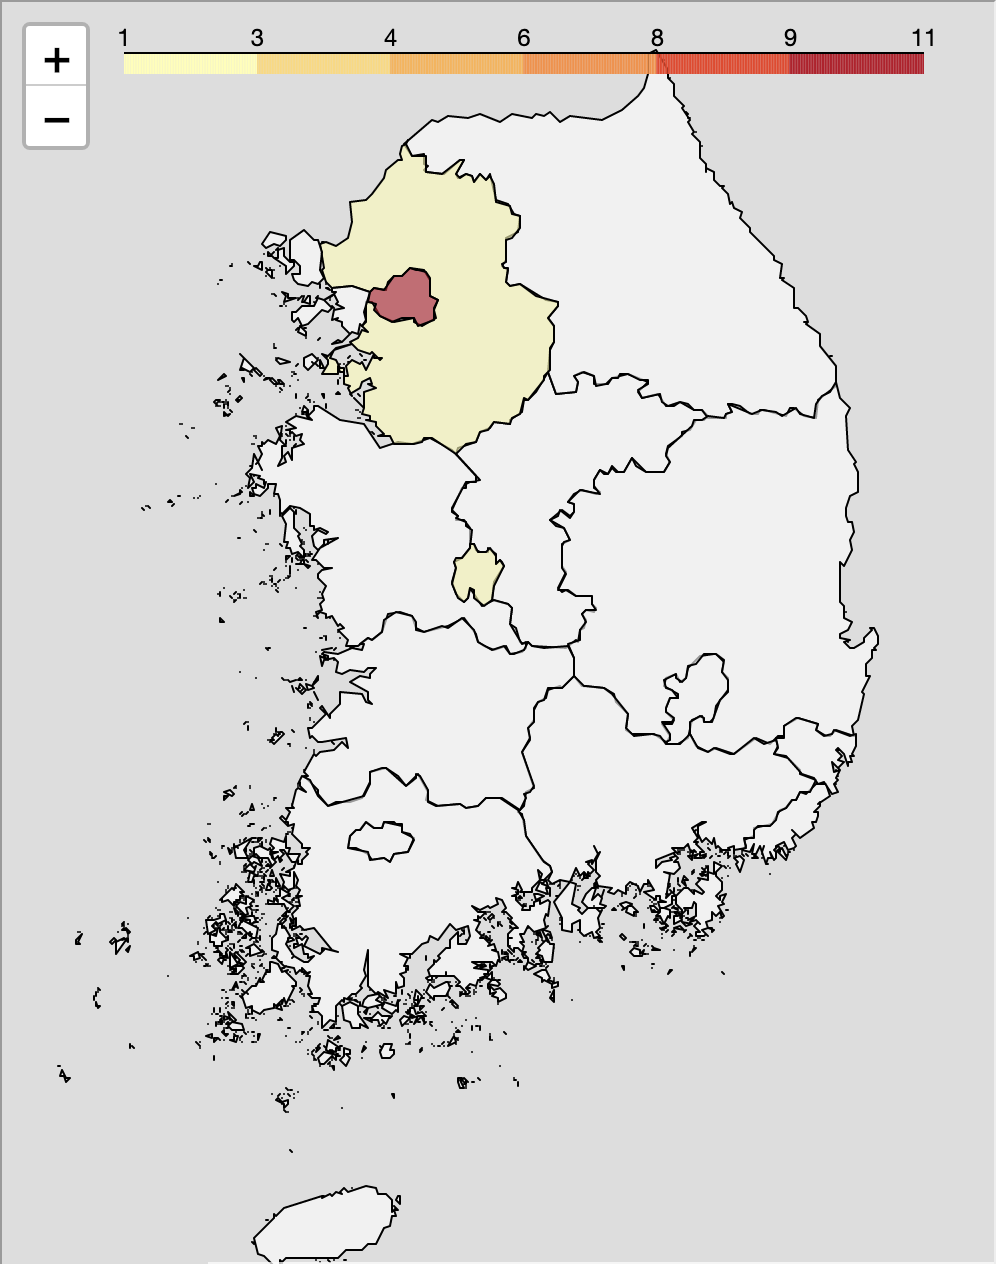

In [31]:
comp_map_pass(df, 'IT/웹/통신', 'title', '사원-고졸')
Image(filename='seventh.png', width = 400, height = 300)

### 3-4. 2019년 [사원] 직급자가 구직에 성공한 회사의 평균 연봉


In [32]:
def salary_pass(user_title):
    print(user_title + '의 합격한 회사의 평균 연봉')
    print("Average Salary:", df['salary'][(df.title == str(user_title))&(df.result == '합격')].mean())
    print("Median Salary:", df['salary'][(df.title == str(user_title))&(df.result == '합격')].median())
    df['salary'][(df.title == str(user_title))&(df.result == '합격')].value_counts().sort_index(ascending = True).plot(kind='bar')
    plt.show()

사원-대졸의 합격한 회사의 평균 연봉
Average Salary: 4444.68085106383
Median Salary: 4000.0


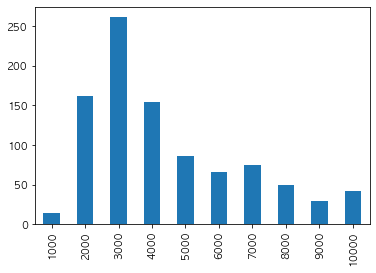

사원-전문대졸의 합격한 회사의 평균 연봉
Average Salary: 5048.0
Median Salary: 5000.0


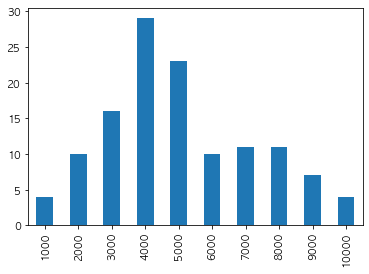

사원-고졸의 합격한 회사의 평균 연봉
Average Salary: 4945.945945945946
Median Salary: 4500.0


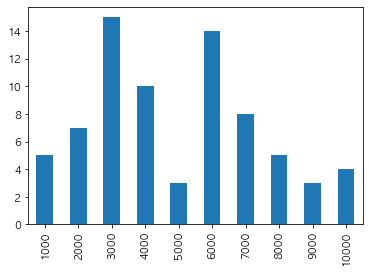

In [33]:
for i in val_lst1:
    salary_pass(i)

### 3-5. 2019년 [사원] 직급자의 면접 질문과 답변
- 사원-대졸
    - 합격자들은 '토론'과 '조직'에 대한 질문 받은게 대다수 / 답변은 자신의 '생각'대로 소신있게 대답함
- 사원-전문대졸
    - 합격자들은 '흡연','시간','사용','업무'에 대한 질문을 대다수 받음 (실용적인 질문이 강함) / 답변은 '준비','퀴즈','책' 등으로 준비하여 대답한 것으로 보임
    - 불합격자들 '영어','자기소개'에 대한 질문을 받음 / 답변은 '업무','부품납땜','리페' 등 실용적인 사용에 대한 답변이 주를 이룸
- 사원-고졸
    - 합격자들은 '교육','가치관'에 대한 질문을 받음 / 답변은 '당황'한게 크지만 '경험'을 바탕으로 대답함


In [34]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
nlp = Twitter()

In [35]:
def word_cloud(question, pass_fail, who):
    word_lst = []
    for i in df[str(question)][(df.title==str(who))&(df.result == str(pass_fail))]:
        val = nlp.pos(str(i))
        word_lst.append(val)

    hts_lst = []
    for pack in word_lst[:10]:
        for word, tag in pack:
            if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and\
                ("수"not in word) and("게"not in word)and("말"not in word)and\
                 ("함"not in word) and("점"not in word):
                hts_lst.append(word)   

    count = Counter(hts_lst)            
    words = dict(count.most_common())
    words

    cloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      background_color='white').generate_from_frequencies(words)
    return cloud


In [36]:
def word_cloud_plot(what, who):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 10))
    pass_user = word_cloud(str(what), '합격', str(who))
    fail_user = word_cloud(str(what), '불합격', str(who))
    if what == 'question':
        what = '면접 질문'
    elif what == 'thought':
        what = '면접 대답'
    ax1.imshow(pass_user)
    ax1.set_title(str(who)+' 합격자의 '+ what)
    ax1.axis('off')
    ax2.imshow(fail_user)
    ax2.set_title(str(who)+' 불합격자의 '+ what)
    ax2.axis('off')
    plt.show()

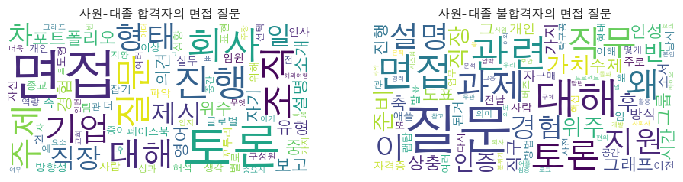

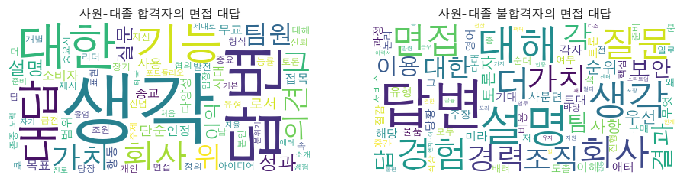

In [37]:
word_cloud_plot('question', '사원-대졸')
word_cloud_plot('thought', '사원-대졸')

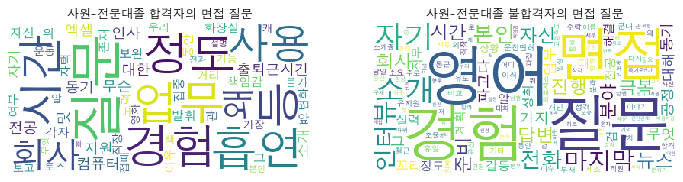

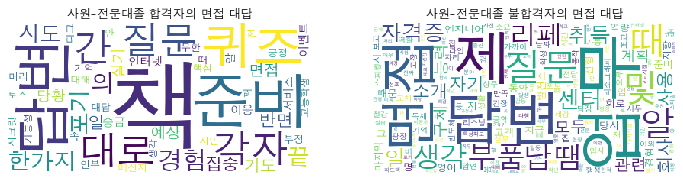

In [38]:
word_cloud_plot('question', '사원-전문대졸')
word_cloud_plot('thought', '사원-전문대졸')

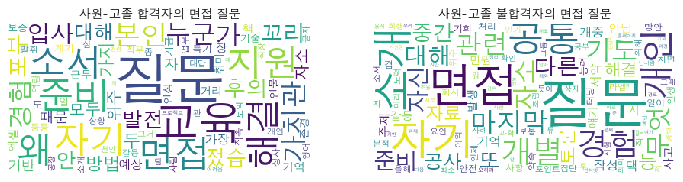

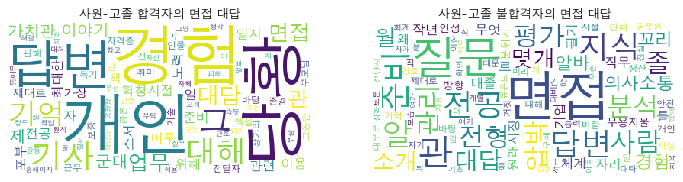

In [39]:
word_cloud_plot('question', '사원-고졸')
word_cloud_plot('thought', '사원-고졸')

### 3-6. 2019년 [사원] 직급자의 면접 난이도와 면접에 대한 생각
- 합격자
    - 면접의 난이도를 '쉬움~보통'으로 생각하는 경향이 있고,
    - 면접의 만족도가 긍정적임
- 불합격자
    - 면접의 난이도를 '어려움~보통'으로 생각하는 경향이 있고,
    - 면접의 만족도는 긍정이나 보통으로 생각함

In [40]:
def satis_diff(who, pass_fail):
    difficult = df['difficult'][(df['title']==str(who))&(df['result'] == str(pass_fail))].value_counts(ascending = True)
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    difficult.plot(kind = 'bar')
    plt.title(str(who)+' '+ str(pass_fail)+'자의 면접 난이도 ')

    
    query = df['experience'][(df['title']==str(who))&
                                     (df['result']==str(pass_fail))].value_counts()
    total_sum = query.values.sum()
    
    lab_lst = []
    val_lst = []
    
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)
        
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
    
    lab_lst = ['긍정적', '보통', '부정적']
    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
            shadow = True, startangle = 90,
            explode = tuple(exp_lst),
            colors = ['green','yellowgreen','red'])
    plt.show()

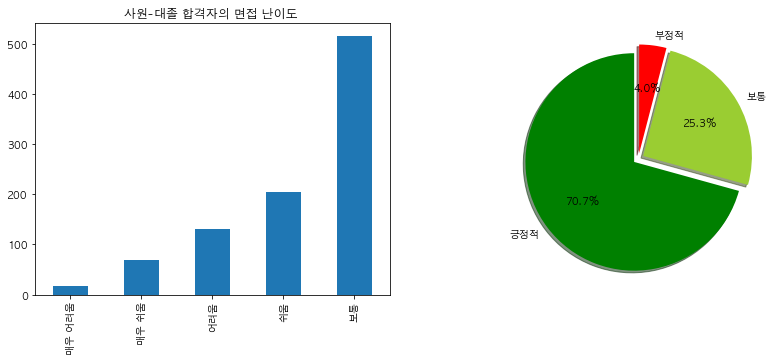

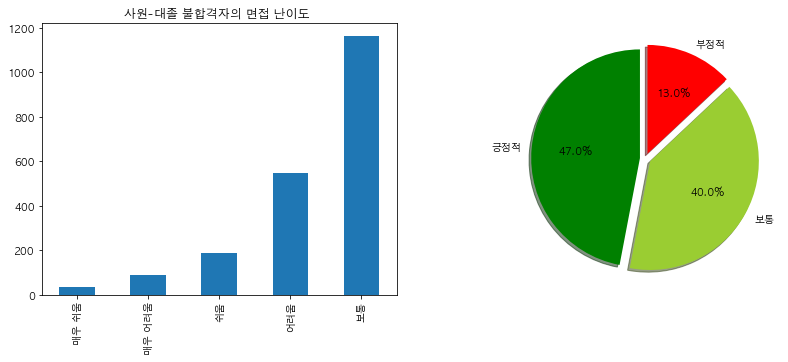

In [41]:
satis_diff('사원-대졸','합격')
satis_diff('사원-대졸','불합격')

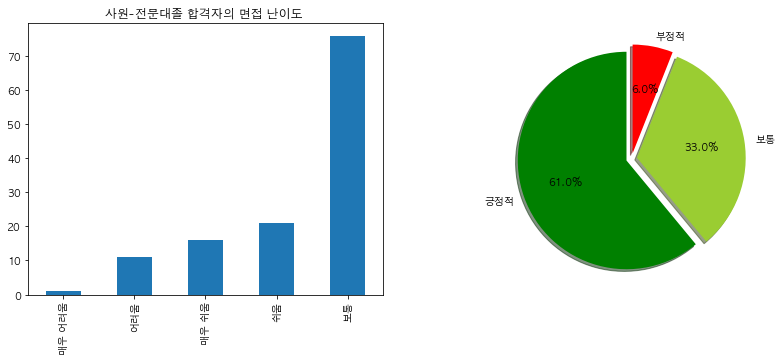

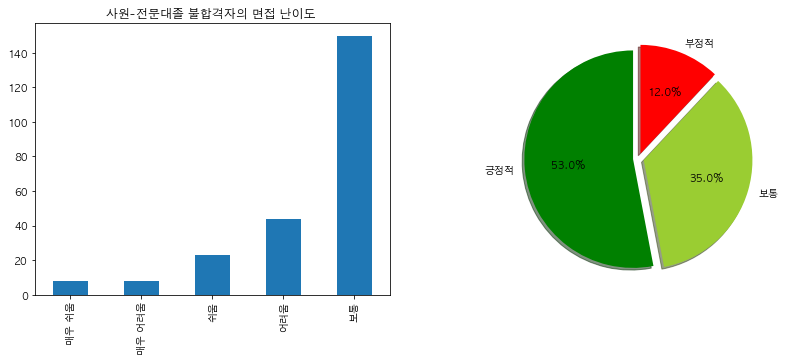

In [42]:
satis_diff('사원-전문대졸','합격')
satis_diff('사원-전문대졸','불합격')

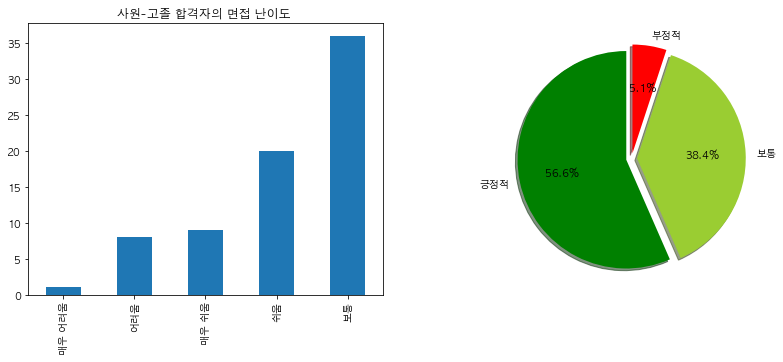

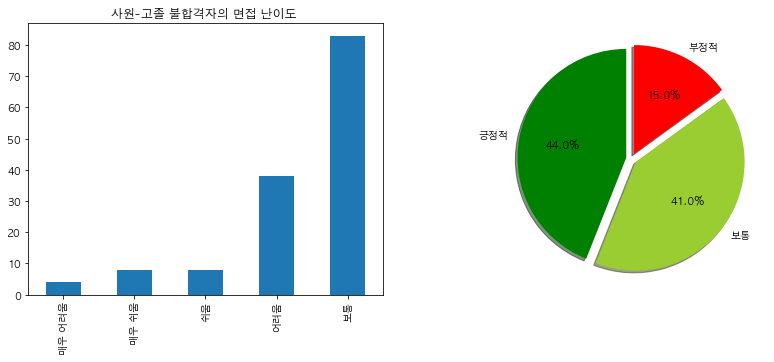

In [43]:
satis_diff('사원-고졸','합격')
satis_diff('사원-고졸','불합격')

## 4.미디어/디자인 회사 데이터 쿼리

In [44]:
media = df[df.type == '미디어/디자인']
media.to_csv('job_media.csv',index = False)
media.shape

(273, 21)

## 5. 추가 분석
- 1. 위와 같이 직급별 세그먼트 분석을 대리, 과장, 부장, 이사로 나눠서 분석
- 2. 산업별 세그먼트 분석 
- 3. 지원부서별 세그먼트 분석 
- 4. 지역별 세그먼트 분석 
- 5. 연봉별 세그먼트 분석
- 6. 면접 난이도별 세그먼트 분석
- 7. 면접 만족도별 세그먼트 분석 

In [45]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')